In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go

In [3]:
acessos = pd.read_pickle("./datasets/acesso.pkl")
acessos.head()

,id_acessos,fim_acesso,id_consumidor_ecommerce,inicio_acesso,ecommerce_id_ecommerce,localidade
0,1,2019-04-22 01:26:28,507,2019-04-22 01:21:24,1,MS - Paraíso das Águas
1,2,2019-06-08 01:16:17,486,2019-06-08 01:11:29,1,PR - Lunardelli
2,3,2019-06-30 01:29:58,483,2019-06-30 01:24:49,1,BA - Santana
3,4,2021-04-20 01:37:07,494,2021-04-20 01:31:56,1,PR - Ângulo
4,5,2020-02-14 01:39:16,510,2020-02-14 01:34:11,1,SC - Sombrio


In [4]:
vendas = pd.read_pickle("./datasets/evento.pkl")
vendas.head()

,id_evento,data_compra,id_consumidor_ecommerce,nome_categoria,nome_produto,preco,cupom_id_cupom,dominio_status_id_dominio_status,ecommerce_id_ecommerce,data_inclusao,sexo,faixa_etaria
0,1,2019-07-09,507,5,Oakley,2290.55,None,1,1,2021-10-08 19:58:47.313441,1,Terceira Faixa
1,2,2019-08-09,486,2,Puma,2589.61,None,1,1,2021-10-08 19:58:47.313441,0,Terceira Faixa
2,3,2019-09-15,483,1,Lacoste,2265.90,None,1,1,2021-10-08 19:58:47.313441,0,Terceira Faixa
3,4,2020-08-17,494,3,Lacoste,2009.16,None,1,1,2021-10-08 19:58:47.313441,0,Terceira Faixa
4,5,2020-03-29,510,2,Adidas,2284.87,None,1,1,2021-10-08 19:58:47.313441,1,Primeira Faixa


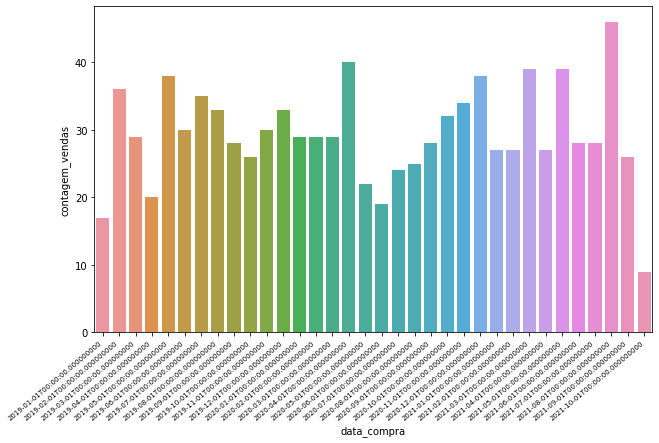

In [61]:
vendas_mes = vendas.groupby(pd.Grouper(key="data_compra", freq="M")).agg({"id_evento":"count"}).reset_index()
vendas_mes.data_compra = vendas_mes.data_compra.values.astype("datetime64[M]")
vendas_mes.rename(columns = {"id_evento": "contagem_vendas"}, inplace=True)
plt.figure(figsize=(10,6))
fig = sns.barplot(x = "data_compra", y = "contagem_vendas", data=vendas_mes)
fig.set_xticklabels(fig.get_xticklabels(), rotation = 40, ha="right", fontsize=7)
plt.show()

In [6]:
data_compra =  vendas_mes.data_compra.values
contagem = vendas_mes.id_evento.values
X = data_compra.reshape(len(data_compra), 1).astype("float")
y = contagem.reshape(len(contagem), 1)
vendas_model = LinearRegression().fit(X, y)
vendas_model_score = vendas_model.score(X, y)

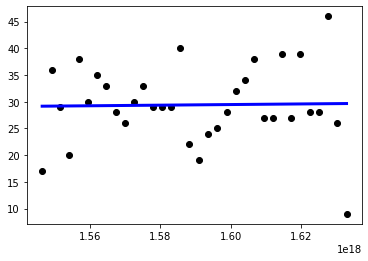

In [7]:
plt.scatter(X, y, color = "black")
plt.plot(X, vendas_model.predict(X), color="blue", linewidth=3)
plt.show()

In [24]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = vendas_model_score,
    domain = { "x": [0, 1], "y": [0, 1] },
    title = { "text": "R² do modelo de previsão dos acessos" },
    gauge = { 
            "axis": {"range": [0, 1]},
            "bar": {"color": "#d8d3ed" },
            "steps": [
                { "range": [ 0, 0.25 ], "color": "#3b82f5" },
                { "range": [0.25, 0.5], "color": "#5432fc" },
                { "range": [0.5, 0.75], "color": "#927ef7" },
                { "range": [0.75, 1], "color": "#c8bef7" },
            ],
            "threshold": {"line": {"color": "#444445", "width": 4}, "thickness": 0.75, "value": vendas_model_score}
        }
))
fig.show()

<AxesSubplot:xlabel='localidade', ylabel='id_acessos'>

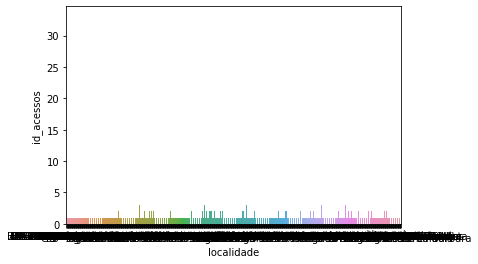

In [51]:
acessos_local = acessos.groupby("localidade").agg({"id_acessos": "count"}).reset_index()
sns.barplot(data = acessos_local, x = "localidade", y = "id_acessos", dodge=False)

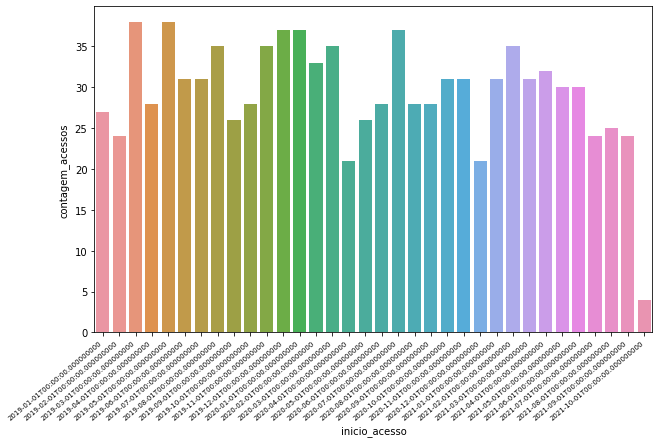

In [59]:
acessos_mes = acessos.groupby(pd.Grouper(key="inicio_acesso", freq = "M")).agg({"id_acessos": "count"}).reset_index()
acessos_mes.inicio_acesso = acessos_mes.inicio_acesso.values.astype("datetime64[M]")
acessos_mes.rename(columns={"id_acessos": "contagem_acessos"}, inplace = True)
plt.figure(figsize=(10,6))
fig = sns.barplot(x = "inicio_acesso", y= "contagem_acessos", data = acessos_mes)
fig.set_xticklabels(fig.get_xticklabels(), rotation = 40, ha="right", fontsize=7)
plt.show()

In [11]:
corr = acessos_mes.id_acessos.corr(vendas_mes.id_evento)
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = corr,
    domain = { "x": [0, 1], "y": [0, 1] },
    title = { "text": "Correlação acessos X vendas por mês" },
    gauge = { 
            "axis": {"range": [-1, 1]},
            "bar": {"color": "#d8d3ed" },
            "steps": [
                { "range": [ -0.3, 0.3 ], "color": "#3b82f5" },
                { "range": [0.3, 0.5], "color": "#5432fc" },
                { "range": [-0.3, -0.5], "color": "#5432fc" },
                { "range": [0.5, 0.7], "color": "#927ef7" },
                { "range": [-0.5, -0.7], "color": "#927ef7" },
                { "range": [0.7, 1], "color": "#c8bef7" },
                { "range": [-0.7, -1], "color": "#c8bef7" },
            ],
            "threshold": {"line": {"color": "#444445", "width": 4}, "thickness": 0.75, "value": corr}
        }
))
fig.show()

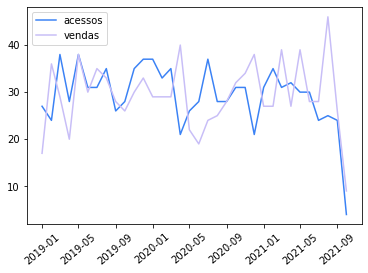

In [36]:
plt.plot(acessos_mes.inicio_acesso, acessos_mes.id_acessos, color = "#3b82f5", label = "acessos")
plt.plot(vendas_mes.data_compra, vendas_mes.id_evento, color = "#c8bef7", label = "vendas")
plt.legend()
plt.xticks(
    rotation=40
)
plt.show()

In [13]:
inicio_acesso = acessos_mes.inicio_acesso.values
contagem = acessos_mes.id_acessos.values
X = inicio_acesso.reshape(len(inicio_acesso), 1).astype("float")
y = contagem.reshape(len(contagem), 1)
acessos_model = LinearRegression().fit(X, y)
acessos_model_score = acessos_model.score(X, y)

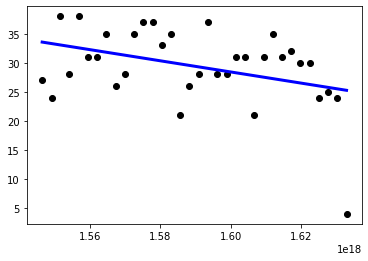

In [18]:
plt.scatter(X, y, color = "black")
plt.plot(X, acessos_model.predict(X), color = "blue", linewidth = 3)
plt.show()

In [22]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = acessos_model_score,
    domain = { "x": [0, 1], "y": [0, 1] },
    title = { "text": "R² do modelo de previsão dos acessos" },
    gauge = { 
            "axis": {"range": [0, 1]},
            "bar": {"color": "#d8d3ed" },
            "steps": [
                { "range": [ 0, 0.25 ], "color": "#3b82f5" },
                { "range": [0.25, 0.5], "color": "#5432fc" },
                { "range": [0.5, 0.75], "color": "#927ef7" },
                { "range": [0.75, 1], "color": "#c8bef7" },
            ],
            "threshold": {"line": {"color": "#444445", "width": 4}, "thickness": 0.75, "value": acessos_model_score}
        }
))
fig.show()